# SE(3) $\mapsto$ SO(3)

In [31]:
from sympy import *
import math
import numpy
from scipy.spatial.transform import Rotation
from IPython.display import display, Math, Latex
sympy.init_printing()

In [12]:
angle = symbols("theta")
axis = numpy.array(sympy.symbols("x y z"))
axis /= angle

In [13]:
def hat(x):
    return numpy.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

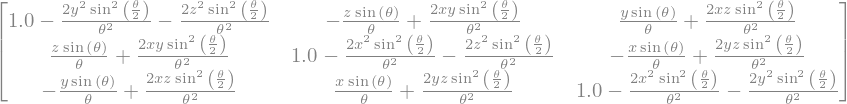

In [14]:
K = hat(axis)
R = numpy.eye(3) + sympy.sin(angle) * K + (2 * sympy.sin(angle / 2)**2) * K @ K
display(sympy.Matrix(R))

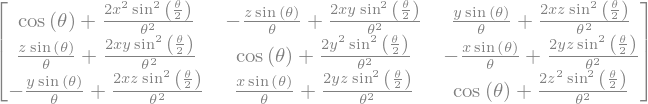

In [85]:
sin_axis = sympy.sin(angle) * axis
c = sympy.cos(angle)
cos1_axis = (2 * sympy.sin(angle / 2)**2) * axis

R = numpy.zeros((3, 3), dtype=sympy.Symbol)
tmp = cos1_axis[0] * axis[1]
R[0, 1] = tmp - sin_axis[2]
R[1, 0] = tmp + sin_axis[2]

tmp = cos1_axis[0] * axis[2]
R[0, 2] = tmp + sin_axis[1]
R[2, 0] = tmp - sin_axis[1]

tmp = cos1_axis[1] * axis[2]
R[1, 2] = tmp - sin_axis[0]
R[2, 1] = tmp + sin_axis[0]

R[[0, 1, 2], [0, 1, 2]] = cos1_axis * axis + c
sympy.Matrix(R)

In [63]:
def norm(x):
    return sqrt(sum(xi**2 for xi in x))


def rotation_matrix(a):
    angle = norm(a)
    axis = a / angle
    K = hat(axis)
    return numpy.eye(3) + sin(angle) * K + (2 * sin(angle / 2)**2) * K @ K

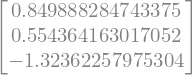

[0.509581907300804 0.332389506480540 -0.793626798774650]


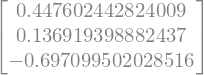

[0.533070652339341 0.163063706309728 -0.830208351740118]


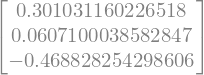

[0.537123005269342 0.108323469562879 -0.836519517496329]


In [107]:
Ri = rotation_matrix(numpy.array([0, 2, 0]))

for i in range(1, 4):
    Rj = rotation_matrix(
        numpy.array([0, 2, 0]) + 1 / i * numpy.array([2, 0, 0]))
    r = R.from_matrix(Rj @ Ri.T)
    display(Matrix(r.as_rotvec()))
    print(r.as_rotvec() / norm(r.as_rotvec()))

In [99]:
0.83794887019243 / 0.420304419428761

In [100]:
0.0803342823292799 / 0.0198820712857076

In [103]:
-0.457773554147916 / -0.229613350826281

In [87]:
from scipy.spatial.transform import Rotation as R

In [88]:
r = R.from_matrix(Rj @ Ri.T)
r.as_rotvec()

array([ 0.91251925, -0.91251925, -0.49851154])

In [89]:
R.from_matrix(
    R.from_rotvec([1, 0, 0]).as_matrix() @ R.from_rotvec(
        [0, 1, 0]).as_matrix().T).as_rotvec()

array([ 0.91251925, -0.91251925, -0.49851154])

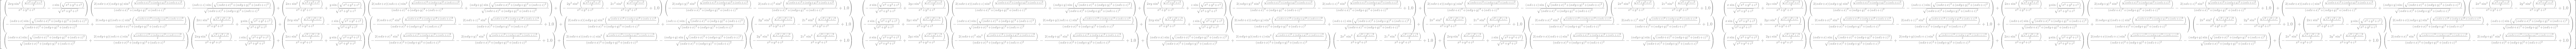

In [84]:
Ri = rotation_matrix(numpy.array(symbols("x y z")))
alpha = symbols("alpha")
Rj = rotation_matrix(
    numpy.array(symbols("x y z")) + alpha * numpy.array(symbols("dx dy dz")))
Matrix(Rj @ Ri.T)